![figure 5.3](assets/5.5_example_5.4.png)

![figure 5.3](assets/5.5_figure_5.3.png)

In [45]:
import random

def get_random_card():
    return random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10])

def calculate_hand_value(cards):
    """Calculate the best value of a hand, handling aces properly"""
    total = sum(cards)
    aces = cards.count(1)
    
    # Convert aces from 1 to 11 if it doesn't bust and improves the hand
    while total <= 11 and aces > 0:
        total += 10  # Convert one ace from 1 to 11
        aces -= 1
    
    return total

def has_usable_ace(cards):
    """Check if hand has a usable ace (ace counted as 11)"""
    total = sum(cards)
    aces = cards.count(1)
    
    # If we have aces and total + 10 <= 21, then we have a usable ace
    return aces > 0 and total + 10 <= 21

# player sticks if sum is 20 or 21, hits otherwise
def player_target_policy(player_cards):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 20:
        return 0  # stick
    else:
        return 1  # hit

def player_behavior_policy(player_cards):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 21:
        return 0
    else:
        return random.choice([0, 1])

def dealer_policy(dealer_cards):
    hand_value = calculate_hand_value(dealer_cards)
    if hand_value >= 17:
        return 0  # stick
    else:
        return 1  # hit

def player_target_probability(player_cards, action):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 20:
        if action == 0:
            return 1
        else:
            return 0
    else:
        if action == 0:
            return 0
        else:
            return 1

def player_behavior_probability(player_cards, action):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 21:
        if action == 0:
            return 1
        else:
            return 0
    else:
        return .5

In [46]:
ITERATIONS = 10_000
RUNS = 100

In [47]:
state_returns = []
for i in range(10_000_000):
    player_cards = [1, 2]
    dealer_cards = [2]

    # Player's turn
    while True:
        player_action = player_target_policy(player_cards)
        if player_action == 0:  # stick
            break
        else:  # hit
            player_cards.append(get_random_card())

    # Dealer's turn 
    while True:
        dealer_action = dealer_policy(dealer_cards)
        if dealer_action == 0:  # stick
            break
        else:  # hit
            dealer_cards.append(get_random_card())
          
    # Determine winner and reward
    player_value = calculate_hand_value(player_cards)
    dealer_value = calculate_hand_value(dealer_cards)
    
    if player_value > 21:
        reward = -1  # player busts
    elif dealer_value > 21:
        reward = 1   # dealer busts
    elif player_value > dealer_value:
        reward = 1   # player wins
    elif player_value < dealer_value:
        reward = -1  # dealer wins
    else:
        reward = 0   # tie
    
    state_returns.append(reward)

average_return = sum(state_returns) / len(state_returns)
print(average_return)

-0.2770152


In [48]:
average_reg_is_mses = [0.0] * ITERATIONS
for j in range(RUNS):
    state_returns = []
    state_return_sum = 0
    for i in range(ITERATIONS):
        player_cards = [1, 2]
        dealer_cards = [2]

        # Player's turn
        target_probability = 1
        behavior_probability = 1
        while True:
            player_action = player_behavior_policy(player_cards)
            target_probability *= player_target_probability(player_cards, player_action)
            behavior_probability *= player_behavior_probability(player_cards, player_action)

            if player_action == 0:  # stick
                break
            else:  # hit
                player_cards.append(get_random_card())


        # Dealer's turn 
        while True:
            dealer_action = dealer_policy(dealer_cards)
            if dealer_action == 0:  # stick
                break
            else:  # hit
                dealer_cards.append(get_random_card())
            
        # Determine winner and reward
        player_value = calculate_hand_value(player_cards)
        dealer_value = calculate_hand_value(dealer_cards)
        
        if player_value > 21:
            reward = -1  # player busts
        elif dealer_value > 21:
            reward = 1   # dealer busts
        elif player_value > dealer_value:
            reward = 1   # player wins
        elif player_value < dealer_value:
            reward = -1  # dealer wins
        else:
            reward = 0   # tie
        
        importance_ratio = target_probability / (behavior_probability)
        adjusted_reward = importance_ratio * reward

        state_returns.append(adjusted_reward)
        state_return_sum += adjusted_reward

        avg_cum_state_return = state_return_sum / (i + 1)

        average_reg_is_mses[i] += (avg_cum_state_return - (-0.27726))**2 / RUNS


    average_return = state_return_sum / len(state_returns)
    print(average_return)

-0.2492
-0.2548
-0.273
-0.2826
-0.2798
-0.2548
-0.2708
-0.2832
-0.2858
-0.2882
-0.2874
-0.3102
-0.2616
-0.2342
-0.3132
-0.2724
-0.268
-0.3156
-0.2854
-0.2468
-0.2804
-0.2534
-0.2758
-0.2832
-0.3148
-0.2184
-0.3008
-0.2616
-0.2764
-0.2494
-0.3016
-0.2966
-0.2978
-0.2806
-0.2634
-0.3052
-0.3126
-0.2032
-0.32
-0.302
-0.2928
-0.2884
-0.279
-0.2776
-0.3306
-0.2776
-0.3106
-0.3204
-0.3196
-0.293
-0.2836
-0.2412
-0.2754
-0.2742
-0.2652
-0.2274
-0.2392
-0.3494
-0.3022
-0.2632
-0.2452
-0.2544
-0.3238
-0.2558
-0.2418
-0.307
-0.2882
-0.3378
-0.2822
-0.266
-0.2088
-0.2584
-0.2458
-0.238
-0.2392
-0.2894
-0.2886
-0.2492
-0.2242
-0.3044
-0.2718
-0.3148
-0.2936
-0.3042
-0.2824
-0.2478
-0.2604
-0.2728
-0.3064
-0.2044
-0.2874
-0.2516
-0.2668
-0.2678
-0.2646
-0.2884
-0.2844
-0.2996
-0.2844
-0.2672


In [49]:
average_weighted_is_mses = [0.0] * ITERATIONS

for j in range(RUNS):
    state_returns = []
    state_return_sum = 0
    importance_ratio_sum = 0
    for i in range(ITERATIONS):
        player_cards = [1, 2]
        dealer_cards = [2]

        # Player's turn
        target_probability = 1
        behavior_probability = 1
        while True:
            player_action = player_behavior_policy(player_cards)
            target_probability *= player_target_probability(player_cards, player_action)
            behavior_probability *= player_behavior_probability(player_cards, player_action)

            if player_action == 0:  # stick
                break
            else:  # hit
                player_cards.append(get_random_card())


        # Dealer's turn 
        while True:
            dealer_action = dealer_policy(dealer_cards)
            if dealer_action == 0:  # stick
                break
            else:  # hit
                dealer_cards.append(get_random_card())
            
        # Determine winner and reward
        player_value = calculate_hand_value(player_cards)
        dealer_value = calculate_hand_value(dealer_cards)
        
        if player_value > 21:
            reward = -1  # player busts
        elif dealer_value > 21:
            reward = 1   # dealer busts
        elif player_value > dealer_value:
            reward = 1   # player wins
        elif player_value < dealer_value:
            reward = -1  # dealer wins
        else:
            reward = 0   # tie
        
        importance_ratio = target_probability / (behavior_probability + .000001)
        adjusted_reward = importance_ratio * reward

        state_returns.append(adjusted_reward)
        state_return_sum += adjusted_reward
        importance_ratio_sum += importance_ratio

        if importance_ratio_sum == 0:
            avg_cum_state_return = 0
        else:
            avg_cum_state_return = state_return_sum / importance_ratio_sum

        average_weighted_is_mses[i] += (avg_cum_state_return - (-0.27726))**2 / RUNS


    average_return = state_return_sum / importance_ratio_sum
    print(average_return)

-0.25627174647004985
-0.28622130969831183
-0.2820806883052449
-0.26194192303244906
-0.2740833413328673
-0.22534823479711055
-0.30820313297039065
-0.28250020668902903
-0.3263352046310266
-0.30693650458101207
-0.28518841382457594
-0.25735301753325107
-0.2740464203089004
-0.259757877022568
-0.25451063420015463
-0.32441170630906296
-0.26669178976783714
-0.24564604717594052
-0.27449916576373784
-0.3310310396879688
-0.24611899404247733
-0.28147475495010466
-0.2858302274953577
-0.3115942899846034
-0.30563349121766825
-0.29421184110913695
-0.2998426966734441
-0.29089741911792977
-0.3118316642050122
-0.2514489778843244
-0.314634463819427
-0.231728041107187
-0.28755054646412376
-0.2996196641525704
-0.28498002845234477
-0.3523912140630653
-0.24533578189470298
-0.29707260189939616
-0.28451920462934427
-0.27622671164474594
-0.27983233239827604
-0.27634952817173647
-0.2497067584419998
-0.2634250281143689
-0.2842090121340883
-0.2704703439166896
-0.24180828221554077
-0.2802348864894001
-0.323041070126

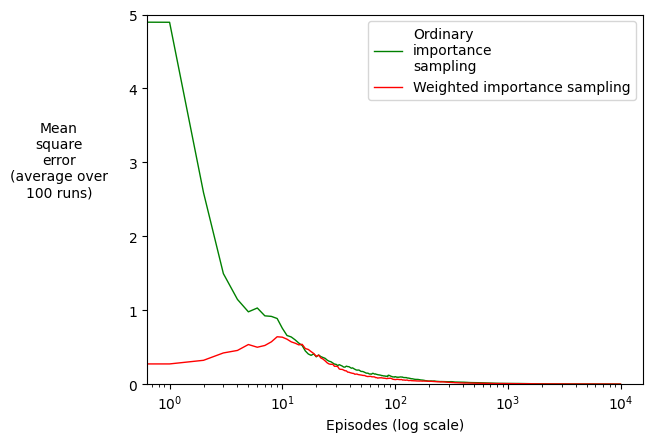

In [50]:
import matplotlib.pyplot as plt

plt.semilogx(average_reg_is_mses, color='green', linewidth=1, label='Ordinary\nimportance\nsampling')
plt.semilogx(average_weighted_is_mses, color='red', linewidth=1, label='Weighted importance sampling')

plt.xlabel('Episodes (log scale)')
plt.ylabel('Mean\nsquare\nerror\n(average over\n100 runs)', rotation=0, labelpad=50)
plt.legend(loc='upper right')
plt.ylim(0, 5)

plt.show()